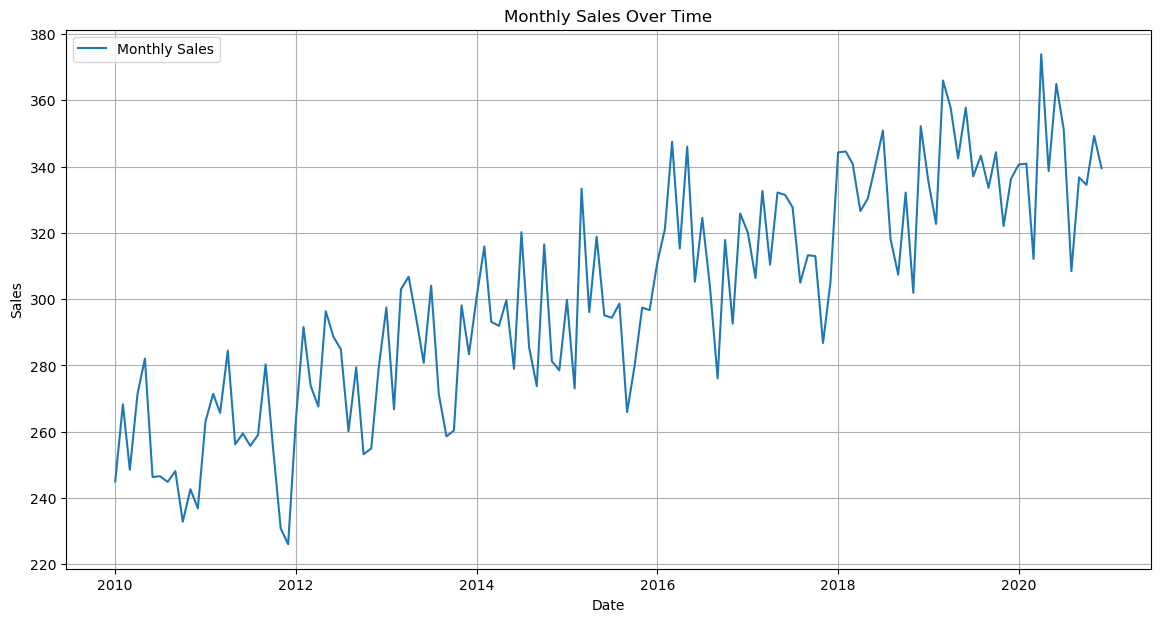

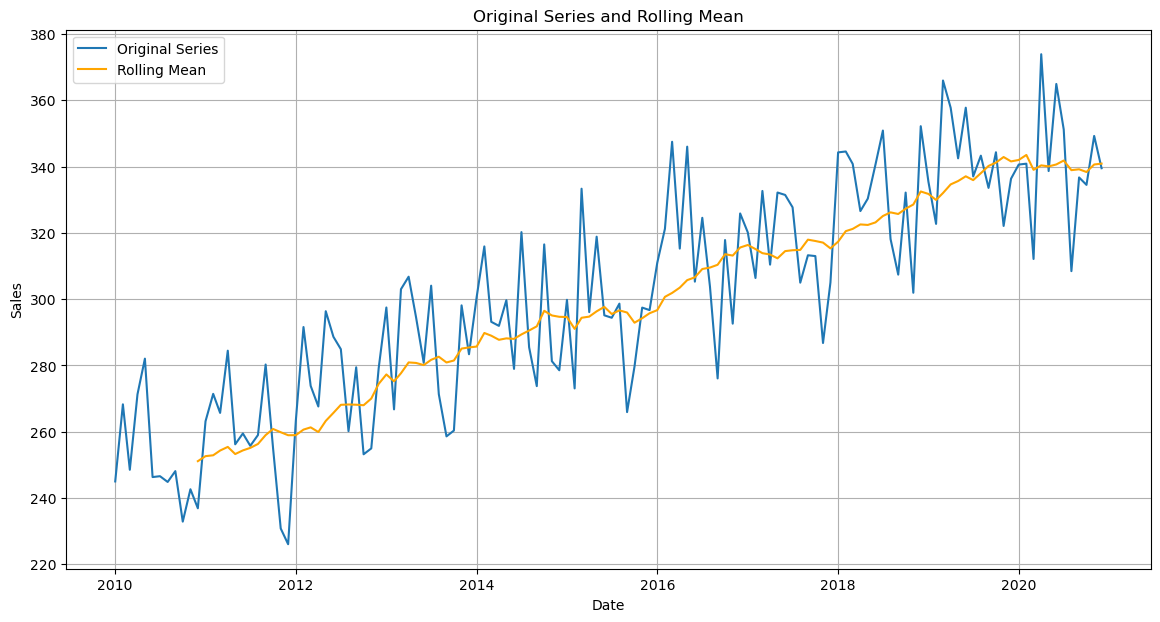

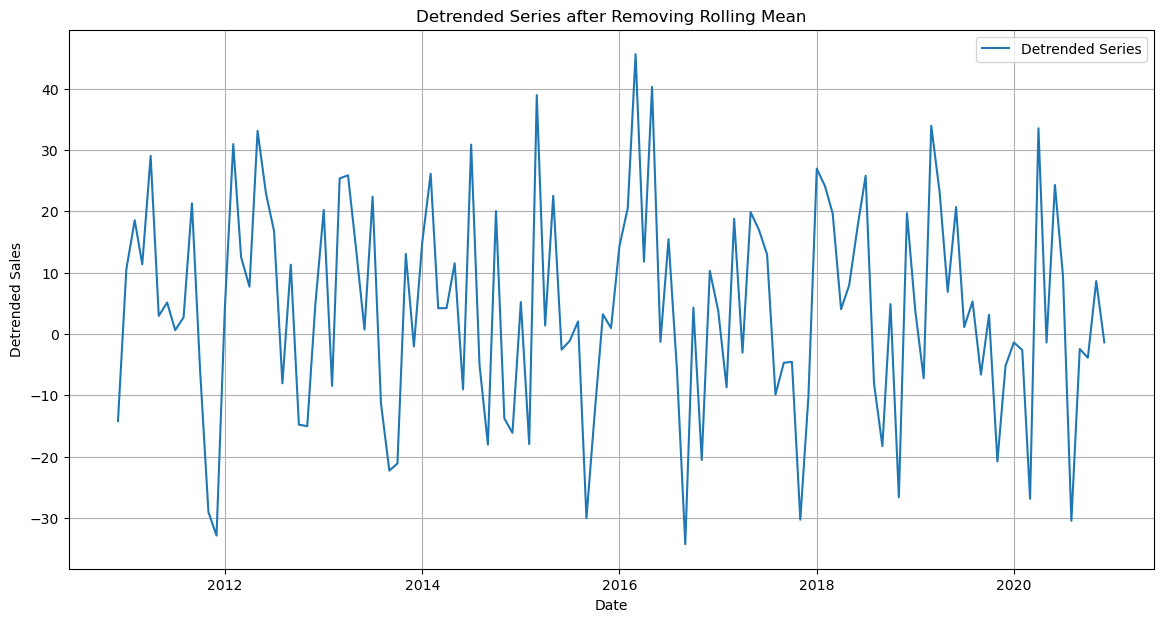

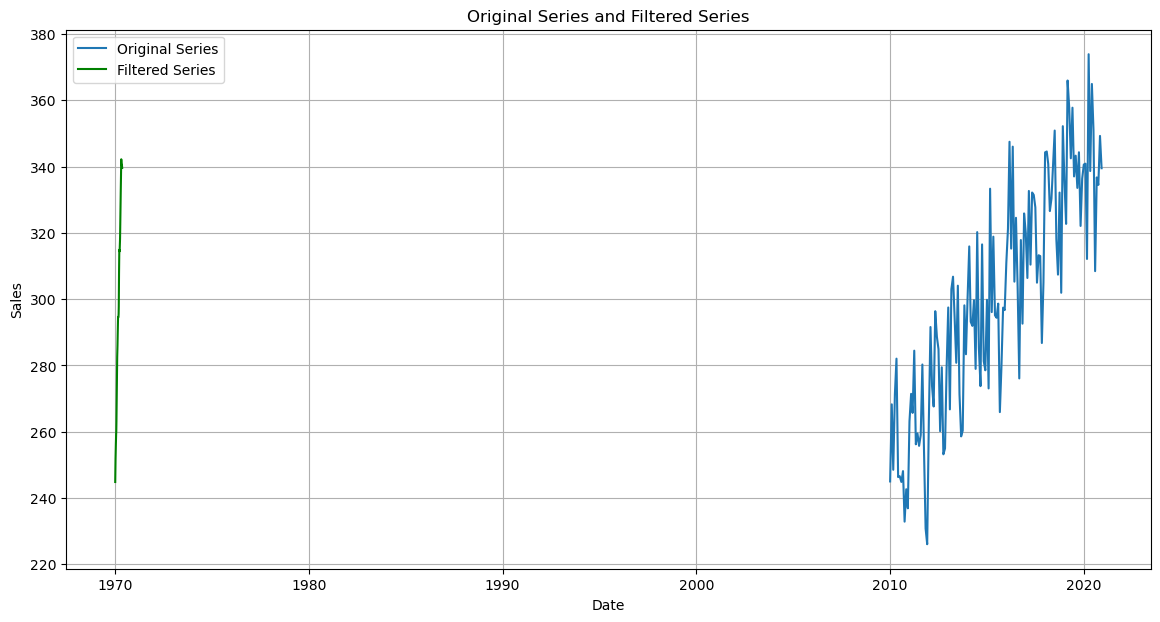

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# Generate synthetic monthly sales data
date_rng = pd.date_range(start='2010-01-01', end='2020-12-01', freq='MS')
np.random.seed(42)
sales = np.random.poisson(lam=200, size=len(date_rng)) + 15 * np.sin(2 * np.pi * np.arange(len(date_rng)) / 12)
sales += np.linspace(50, 150, len(date_rng))  # Adding a trend component
sales_series = pd.Series(sales, index=date_rng)

# Plot the original time series
plt.figure(figsize=(14, 7))
plt.plot(sales_series, label='Monthly Sales')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Smooth the series with a rolling mean to detrend
rolling_mean = sales_series.rolling(window=12).mean()

# Plot original and rolling mean
plt.figure(figsize=(14, 7))
plt.plot(sales_series, label='Original Series')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.title('Original Series and Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Detrend the series
detrended_series = sales_series - rolling_mean

# Plot detrended series
plt.figure(figsize=(14, 7))
plt.plot(detrended_series, label='Detrended Series')
plt.title('Detrended Series after Removing Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Detrended Sales')
plt.legend()
plt.grid(True)
plt.show()

# Apply a low-pass filter to remove high-frequency noise
b, a = signal.butter(3, 0.1)  # Butterworth filter with order 3 and cutoff at 0.1
filtered_series = signal.filtfilt(b, a, sales_series)

# Plot original and filtered series
plt.figure(figsize=(14, 7))
plt.plot(sales_series, label='Original Series')
plt.plot(filtered_series, label='Filtered Series', color='green')
plt.title('Original Series and Filtered Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
